# Flocking

## Original world

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import ipywidgets as widgets

In [3]:
df = pd.read_csv('orig.csv', skiprows=6).drop(columns=[])
df = df.rename(columns={'[run number]': 'run_num', '[step]': 'step', 'get-global-alignment': 'align', 'get-global-cc': 'ccoef'})
df.columns

Index(['run_num', 'v', 'eta', 'step', 'align', 'ccoef'], dtype='object')

In [14]:
sns.lineplot(data=df, x='step', y='align', hue='v', style='eta')
plt.show()

Firstly, analyze v:

- v = 1:  
Alignment coefficient grows slower. But finally becomes the same as for other v with current eta.
- v = 2-4:  
Almost doesn't differ within one eta.

Then eta:

- eta = 0:  
Perfect alignment after short period of time.
- eta = 30-90:  
Alignment falls rapidly. Due to high noise.
- eta = 120:  
Almost no alignment among turtles.

Conclusions:
1. For v = 1 alignment grows slower.
2. Final alignment depends only on eta.
3. With growth of eta falls rapidly.

In [16]:
df.dtypes

run_num      int64
v            int64
eta          int64
step         int64
align      float64
ccoef      float64
dtype: object

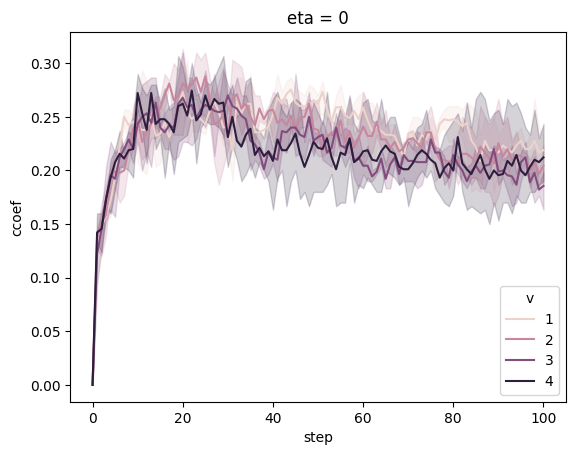

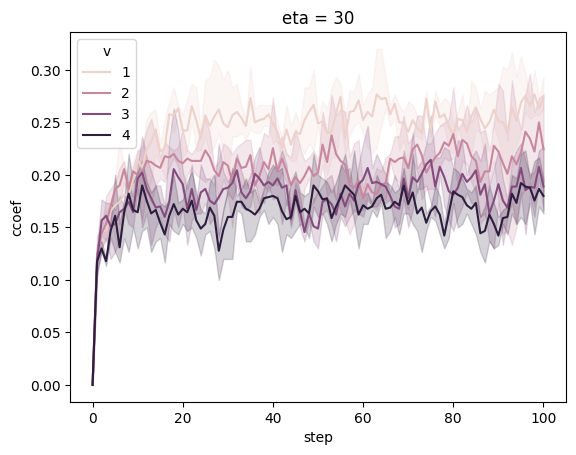

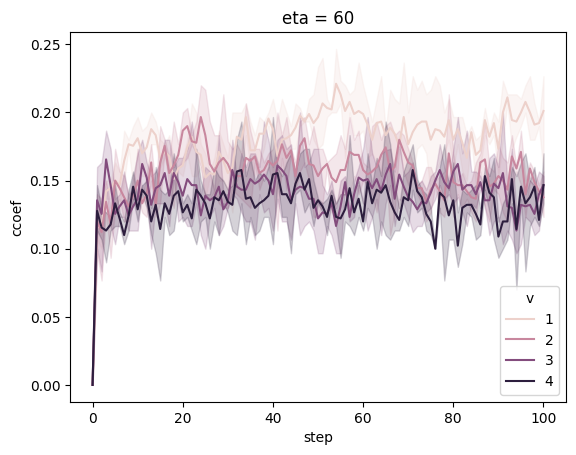

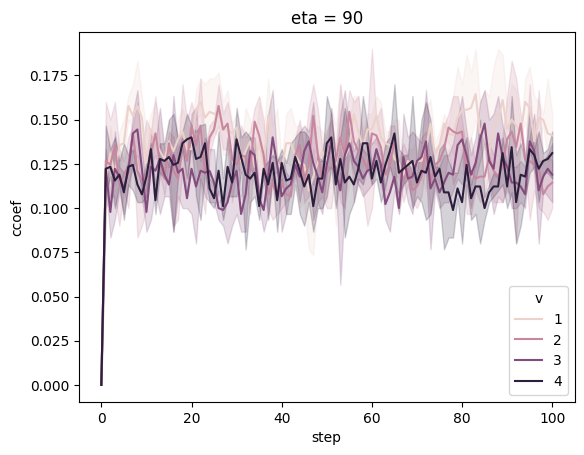

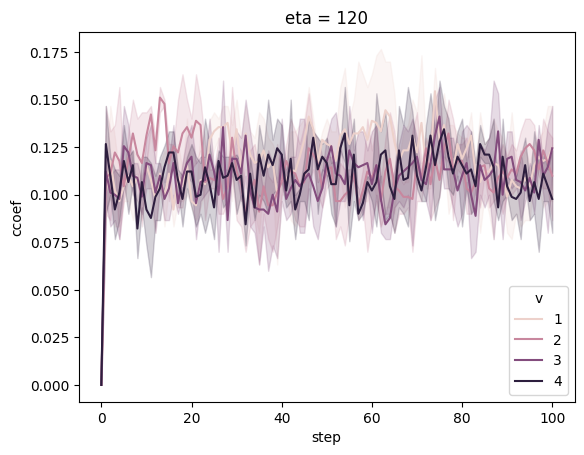

In [20]:
for eta in sorted(df['eta'].unique()):
    sns.lineplot(data=df[df['eta'] == eta], x='step', y='ccoef', hue='v').set(title=f'eta = {eta}')
    plt.show()

Conclusions:
1. Clustering coefficient also depends on eta.
2. For middle eta clustering coefficient is higher for smaller velocity. Maybe, because turtles doesn't go far from each other after turning due to random noise.

## World with obstacles

In [4]:
df2 = pd.read_csv('obst.csv', skiprows=6).drop(columns=[])
df2 = df2.rename(columns={'[run number]': 'run_num', '[step]': 'step', 'get-global-alignment': 'align', 'get-global-cc': 'ccoef'})
df2.columns

Index(['run_num', 'v', 'eta', 'step', 'align', 'ccoef'], dtype='object')

In [9]:
df['world_type'] = 'orig'
df2['world_type'] = 'obst'
joined = pd.concat([df, df2]).reset_index(drop=True)
joined.head()

run_num  v  eta  step     align  ccoef world_type
0        1  1    0     0  0.054861    0.0       orig
1        5  1   30     0  0.006899    0.0       orig
2        2  1    0     0  0.046617    0.0       orig
3        4  1   30     0  0.063593    0.0       orig
4        3  1    0     0  0.101736    0.0       orig

In [13]:
numeric_columns = ['align', 'ccoef']

dd = widgets.Dropdown(options=numeric_columns, description='Metric')
slider = widgets.IntSlider(value=0, min=0, max=120, step=30, description='Eta')

ui = widgets.HBox([dd, slider])

def draw_lineplot(metric, eta):
    filtered = joined[joined['eta'] == eta]
    for v in sorted(filtered['v'].unique()):
        sns.lineplot(data=filtered[filtered['v'] == v], x='step', y=metric, style='world_type').set(title=f'v = {v}')
        plt.show()

out = widgets.interactive_output(draw_lineplot, {'metric': dd, 'eta': slider})

display(ui, out)

Output()

Firstly, look at alignment.

Analyze noise:
- eta >= 120  
Results are absolutely messy due to random move of turtles.
- eta <= 90:  
Global alignment is higher for original type. Because in this type of world all turtles can finally move in one direction. Whereas, in second type of world, seperate flocks often bump in walls when they try to move in one direction.

Analyze velocity:  
- Higher v - bigger difference. Because turtles move more away from each other after bumping in the wall.

Conclusions:
1. Global alignment is higher for world without obstacles. In initial type of world all turtles can finally move in one direction.
2. Higher velocity - bigger difference in global alignment. Turtles move more away after bump.

Secondly, look at global clustering coefficient.

Analyze noise:
- eta >= 120  
Results are absolutely messy due to random move of turtles.
- eta <= 90:  
Clustering coefficient is higher for world with obstacles. Walls make turtles join in few dense flocks. Meanwhile, in the initial world turtles can spread on the whole world.

Analyze velocity:  
- No difference between different velocities.

Conclusions:
1. Clustering coefficient is higher for world with obstacles.

## Conclusions

Original world:
1. For velocity = 1 global alignment grows slower.
2. Final alignment value depends only on eta.
3. With growth of eta alignment falls rapidly.
4. Clustering coefficient also depends only on eta.
5. For middle eta clustering coefficient is higher for smaller velocity.

Comparison with world with obstacles:
1. Global alignment is higher for world without obstacles.
2. Higher velocity - bigger difference in global alignment.
3. Clustering coefficient is higher for world with obstacles.